In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [13]:
numerical_columns= df.columns[df.dtypes!= 'object']
categorical_columns= df.columns[df.dtypes=='object']

In [14]:
numerical_columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [15]:
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

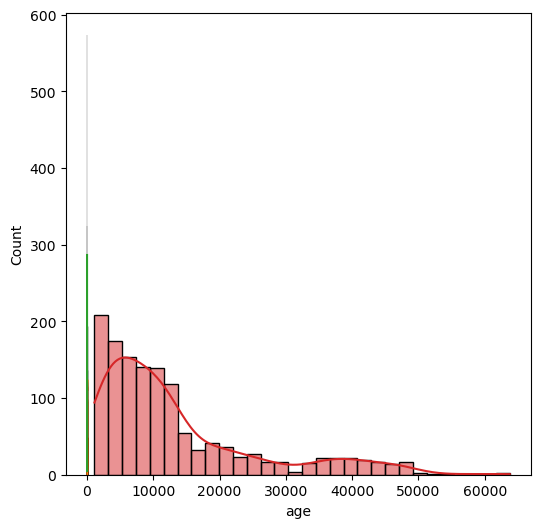

In [19]:
plt.figure(figsize=(6,6))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show

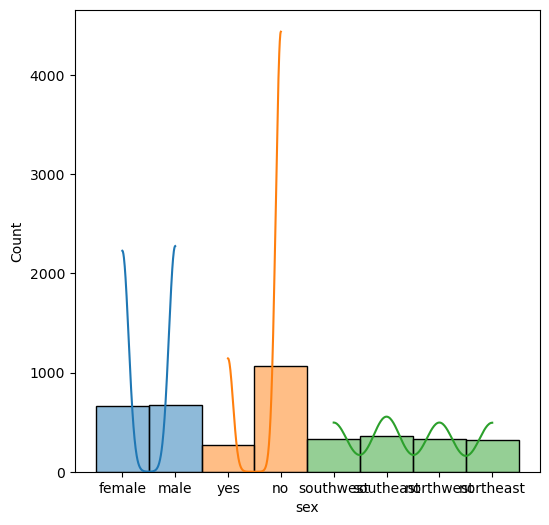

In [21]:
plt.figure(figsize=(6,6))
x=1
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show

In [23]:
df.corr()

C:\Users\U.S\AppData\Local\Temp\ipykernel_5176\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

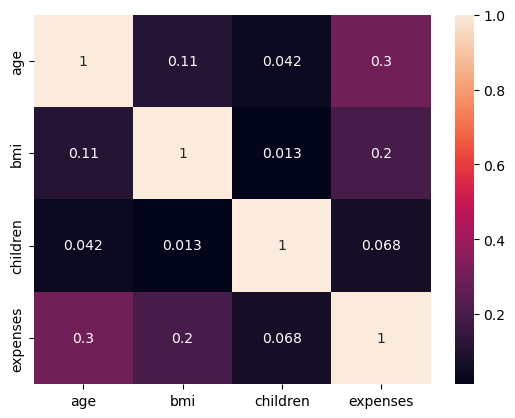

In [22]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

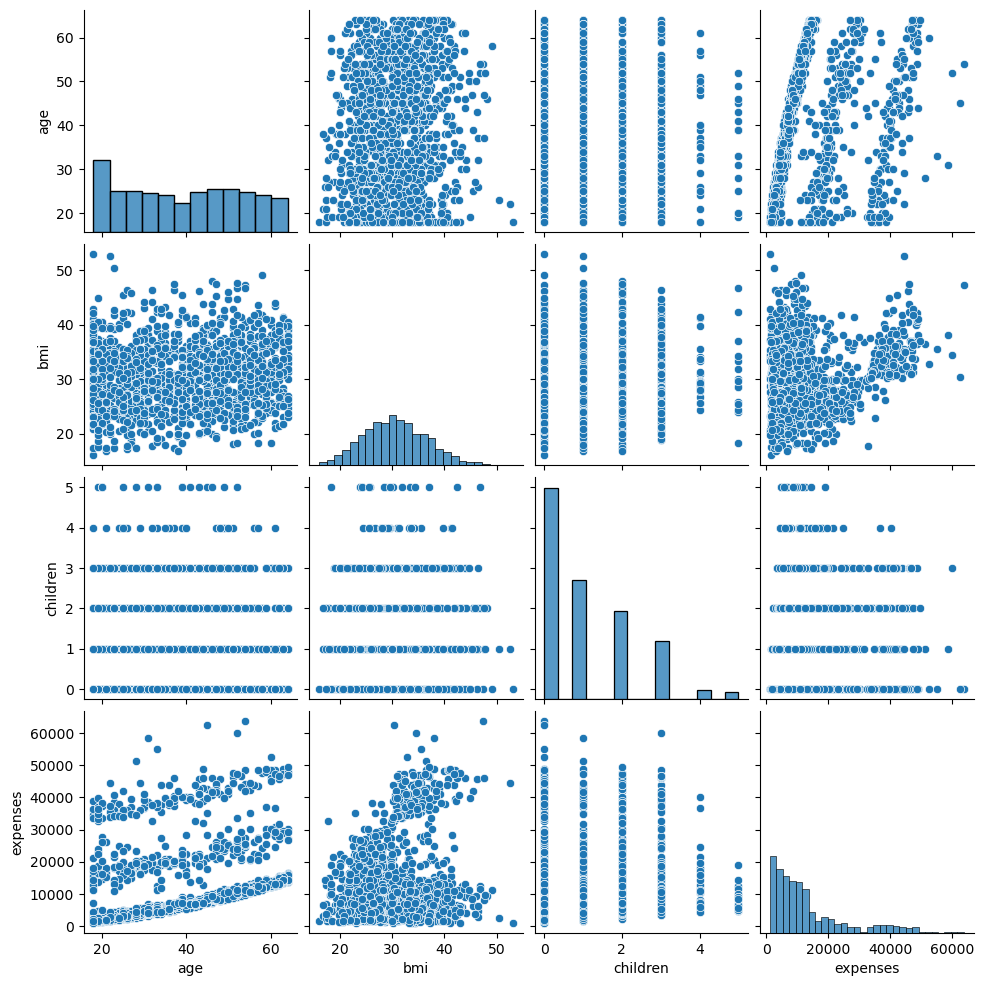

In [24]:
sns.pairplot(df)

In [25]:
print('Categorical_Columns:',categorical_columns)

Categorical_Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [26]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [27]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
smoker_map={"yes":1,"no":2}
sex_map={"male":1,"female":2}
region_map= {"southwest":1,"southeast":2,"northwest":3,"northeast":4}

In [30]:
df['smoker'].replace(smoker_map)

0       1
1       2
2       2
3       2
4       2
       ..
1333    2
1334    2
1335    2
1336    2
1337    1
Name: smoker, Length: 1338, dtype: int64

In [31]:
df['sex'].replace(sex_map)

0       2
1       1
2       1
3       1
4       1
       ..
1333    1
1334    2
1335    2
1336    2
1337    2
Name: sex, Length: 1338, dtype: int64

In [32]:
df['region'].replace(region_map)

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [33]:
X= df.drop(labels=['expenses'],axis=1)
y=df[['expenses']]

In [34]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [35]:
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [36]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [37]:
sex_categories=['male','female']
smoker_categories=['yes','no']
region_categories=['southwest','southeast','northwest','northeast']

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


In [40]:
# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[sex_categories,smoker_categories,region_categories])),
    ('scaler',StandardScaler())
    ]

)

In [41]:
preprocessor=ColumnTransformer(transformers=[
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score

In [43]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
X_train.head()

,age,sex,bmi,children,smoker,region
332,61,female,31.2,0,no,northwest
355,46,male,27.6,0,no,southwest
138,54,female,31.9,3,no,southeast
381,55,male,30.7,0,yes,northeast
292,25,male,45.5,2,yes,southeast


In [47]:
X_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest


In [48]:
y_train.head()

,expenses
332,13429.04
355,24603.05
138,27322.73
381,42303.69
292,42112.24


In [49]:
y_test.head()

,expenses
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [50]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor

In [52]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'gender' is a categorical feature in your dataset
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['sex']])


In [56]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))


In [57]:
X_test=pd.DataFrame(preprocessor.fit_transform(X_test))

In [58]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [59]:
regression.coef_

array([[ 3693.03258171,  2065.227103  ,   514.67950194,   -54.90388647,
        -9592.59777741,   362.95254164]])

In [60]:
regression.intercept_

array([13379.15744658])

In [61]:
import numpy as np

In [62]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square= r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [63]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso': Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'Adaboost':AdaBoostRegressor(),
    'Gradientboost': GradientBoostingRegressor(),
    'RandomForest': RandomForestRegressor()
}

In [65]:
pip install --upgrade scikit-learn


     ---------------------------------------- 10.6/10.6 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [66]:
model_list= []
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae,mse,rmse,r2_square = evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model training Performance")
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("MSE:",mse)
    print('R2-Score:', r2_square*100)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')

LinearRegression
Model training Performance
RMSE: 5815.591652406636
MAE: 4132.354691843099
MSE: 33821106.267541744
R2-Score: 76.93349315963395


Lasso
Model training Performance
RMSE: 5815.5118546452495
MAE: 4132.1959072624995
MSE: 33820178.13151943
R2-Score: 76.93412616246178




TypeError: solve() got an unexpected keyword argument 'sym_pos'